## Setup

In [1]:
!rm -rf /kaggle/working/*

In [2]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2516, done.
remote: Total 2516 (delta 0), reused 0 (delta 0), pack-reused 2516 (from 1)
Receiving objects: 100% (2516/2516), 8.20 MiB | 23.52 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.


In [3]:
!ls

pytorch-CycleGAN-and-pix2pix


In [4]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [5]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.4 MB/s eta 0:00:0000:010:01
  Preparing metadata (setup.py) ... done
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408195 sha256=7846686c07c951fc767a8822842292153ee8eb6a5fa0afb9ff1d81c136f62493
  Stored in directory: /root/.cache/pip/wheels/42/29/49/5bed207bac4578e4d2c0c5fc0226bfd33a7e2953ea56356855
Successfully built visdom


In [6]:
!pip install dominate

## Preparing dataset

In [7]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split


def organize_images(dataset_dir, output_dir, num_images=1000, test_size=0.2):
    original_folder = os.path.join(dataset_dir, 'original')
    retouched_folder = os.path.join(dataset_dir, 'retouched')
    
    original_images = os.listdir(original_folder)
    retouched_images = os.listdir(retouched_folder)

    paired_images = [img for img in original_images if img in retouched_images]

    # shuffle and select defined number of images
    random.shuffle(paired_images)
    selected_images = paired_images[:num_images]

    train_images, test_images = train_test_split(selected_images, test_size=test_size, random_state=42)

    # create output directories
    os.makedirs(os.path.join(output_dir, 'trainA'), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'trainB'), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'testA'), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'testB'), exist_ok=True)

    # copy images to output directory
    for img in train_images:
        shutil.copy(os.path.join(original_folder, img), os.path.join(output_dir, 'trainA', img))
        shutil.copy(os.path.join(retouched_folder, img), os.path.join(output_dir, 'trainB', img))

    for img in test_images:
        shutil.copy(os.path.join(original_folder, img), os.path.join(output_dir, 'testA', img))
        shutil.copy(os.path.join(retouched_folder, img), os.path.join(output_dir, 'testB', img))

In [8]:
organize_images('/kaggle/input',
                '/kaggle/working/pytorch-CycleGAN-and-pix2pix/dataset',
                num_images=1000,
                test_size=0.2)

In [4]:
# import os

# os.chdir("/kaggle/input")
# !ls

original  retouched


## Load pretrained model


Available models: [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]

In [9]:
!bash ./scripts/download_cyclegan_model.sh horse2zebra

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [horse2zebra]
for details.

--2024-10-26 09:35:37--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/horse2zebra.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: './checkpoints/horse2zebra_pretrained/latest_net_G.pth'

./checkpoints/horse 100%[===================>]  43.46M  28.5MB/s    in 1.5s    

2024-10-26 09:35:38 (28.5 MB/s) - './checkpoints/horse2zebra_pretrained/latest_net_G.pth' saved [45575747/45575747]



## Train model on data

In [8]:
import os

# os.chdir('..')

# os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [ ]:
!python train.py --dataroot ./dataset --name face_retouch_v2 --model cycle_gan --display_id -1 --n_epochs 30 --n_epochs_decay 5

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./dataset                     	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: -1                            	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
 

## Testing

In [19]:
!ls checkpoints/

face_retouch_v1  horse2zebra_pretrained


In [20]:
!python test.py --dataroot dataset/testA --name horse2zebra_pretrained --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: dataset/testA                 	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

## Visualizing

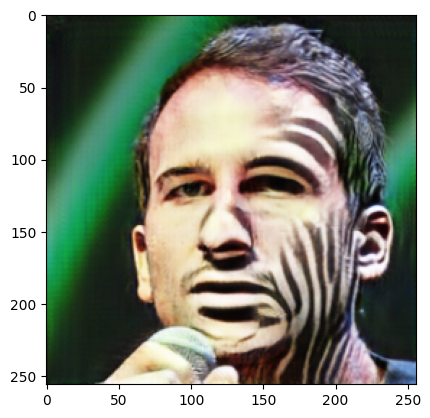

In [21]:
import matplotlib.pyplot as plt

img = plt.imread('./results/horse2zebra_pretrained/test_latest/images/02440_fake.png')
plt.imshow(img)

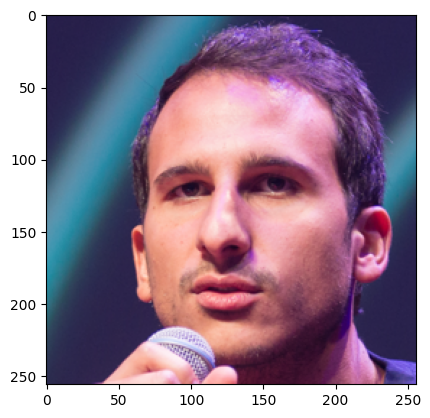

In [22]:
import matplotlib.pyplot as plt

img = plt.imread('./results/horse2zebra_pretrained/test_latest/images/02440_real.png')
plt.imshow(img)